In [3]:
import sys
#sys.path.append("/home/cgagne/Dropbox/python/PyMVPA-master")
#sys.path.append("/gpfs/home/cgagne/python/PyMVPA-master")
#sys.path.append("/gpfs/home/cgagne/python/PyMVPA-master/mvpa2/lib/python2.6/site-packages")
sys.path.append("/home/bishop/cgagne/MVPA_Analysis/CCV_Files/PyMVPA/mvpa2")
#import mdp # so PCAmapper can work


from mvpa2.tutorial_suite import *
import numpy as np
import pdb
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#### Save each subject's data for frontal and Occiptal

- save's time later

In [4]:
subs = ['01','02','04','05','06','07','08','09',
        '10','11','12','13','14','15','16','17','18','19','20','21','22']
rois_nums = [0,3]
rois = ['Occipital_Lobe','Parietal_Lobe','Temporal_Lobe','Frontal_Lobe','Medial_Frontal','Lateral_Frontal']

rois = ['MD_IFGop_R','MD_IFGop_L','MD_Insula_R','MD_Insula_L',
        'MD_MFG_R','MD_MFG_L','MD_ACC','MD_PrecG_R','MD_PrecG_L']
rois = rois+['AAL_Calcarine_L','AAL_Calcarine_R',
             'AAL_Cuneus_L','AAL_Cuneus_R',
            'AAL_Occipital_Inf_L','AAL_Occipital_Inf_R',
            'AAL_Occipital_Mid_L','AAL_Occipital_Mid_R',
            'AAL_Occipital_Sup_L','AAL_Occipital_Sup_R']
print(rois)

['MD_IFGop_R', 'MD_IFGop_L', 'MD_Insula_R', 'MD_Insula_L', 'MD_MFG_R', 'MD_MFG_L', 'MD_ACC', 'MD_PrecG_R', 'MD_PrecG_L', 'AAL_Calcarine_L', 'AAL_Calcarine_R', 'AAL_Cuneus_L', 'AAL_Cuneus_R', 'AAL_Occipital_Inf_L', 'AAL_Occipital_Inf_R', 'AAL_Occipital_Mid_L', 'AAL_Occipital_Mid_R', 'AAL_Occipital_Sup_L', 'AAL_Occipital_Sup_R']


In [11]:

for roi_name in rois:
    print(roi_name)
    for sub in subs:
        print(sub)
        subject = sub
        basefolder='/home/bishop/cgagne/MVPA_Analysis/data_inhouse_fmri'
        subjectfolder = basefolder+"/data_mri/fmri_"+subject+"_TRI/bold/"
        subjectbehfolder = basefolder+"/data_behavioral/fmri_"+subject+"_TRI/tribehav/"
        roifolder = basefolder+"/data_rois/"
        resultsfolder = basefolder+"/results/"
        stim='rule'
        onset = '+4'
        attr = SampleAttributes(os.path.join(subjectbehfolder,'TR'+stim+'onsets'+onset+'.txt')) # order 2 has exact timings...
        ds = fmri_dataset(os.path.join(subjectfolder,'wraf.nii.gz'),targets=attr.targets,chunks=attr.chunks,mask=os.path.join(roifolder,roi_name+'_sized_0.nii.gz')) # can add mask here. 
        
        detrender = PolyDetrendMapper(polyord=1,chunks_attr='chunks')
        ds= ds.get_mapped(detrender) # detrend by run
        zscore(ds,param_est=('targets',['0'])) # zscore with respect to rest. 
        ds = ds[ds.sa.targets != ['0']] # remove rest times 
        ds.save('../data_inhouse_fmri/data_derived_for_reliabilities/'+subject+'_'+roi_name+'_'+stim+'_z.hdf5')

MD_IFGop_R
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_IFGop_L
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_Insula_R
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_Insula_L
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_MFG_R
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_MFG_L
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_ACC
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_PrecG_R
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
MD_PrecG_L
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
AAL_Calcarine_L
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
AAL_Calcarine_R
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
AAL_Cuneus_L
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
AAL_Cuneus_R
01
02
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
AAL_Occipital_Inf_L
01
02
04
0

#### Correlation Anaysis All Subjects

In [152]:
def within_between_for_each_sub(sub,roi_number):
        
        # load data 
        ds = mvpa2.base.hdf5.h5load('../data_intermediate_for_reliabilities/'+sub+'_'+str(roi_number)+'.hdf5')

        # sort rows of data by stimulus type
        re_arrange_indices = np.argsort(ds.sa.targets)
        targets_sorted = ds.sa.targets[re_arrange_indices]
        X_sorted = ds.samples[re_arrange_indices,:]
        
        # get spatial correlation matrix
        C=np.corrcoef(X_sorted)
        C_for_plot = C.copy()
        
        # calculate the average within and betwen type correlations
        within_type_means = np.zeros(8) # there are 8 stimulus types
                                        
        for t,targ in enumerate(np.arange(1,9)):
            targ_C_indices = np.where(targets_sorted==str(targ))[0]
            same_type = C[targ_C_indices.repeat(len(targ_C_indices)),
              np.tile(targ_C_indices,(len(targ_C_indices)))]
            within_type_means[t]=same_type.mean()
            C[targ_C_indices.repeat(len(targ_C_indices)),
              np.tile(targ_C_indices,(len(targ_C_indices)))]=np.nan

        between_type_mean = np.nanmean(C)
        return(within_type_means,between_type_mean,C,C_for_plot,targets_sorted)

In [153]:


within_type_means_subs_rois = np.zeros((len(subs),len(rois_nums)))
between_type_means_subs_rois = np.zeros((len(subs),len(rois_nums)))

for r,roi_number in enumerate(rois_nums):
    for s,sub in enumerate(subs):
    
        (within_type_means,between_type_mean,C,C_for_plot,_)= within_between_for_each_sub(sub,roi_number)
        
        # save 
        within_type_means_subs_rois[s,r]=within_type_means.mean()
        between_type_means_subs_rois[s,r]=between_type_mean                            
                                       

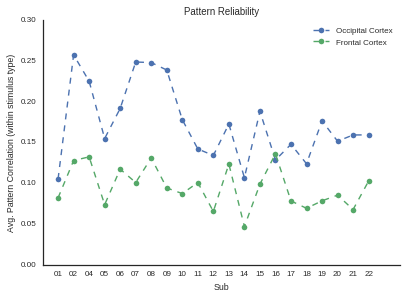

In [158]:
sns.set_context('paper')
sns.set_style('white')
#plt.figure(figsize=(12,6))

plot_between=False

plt.plot(np.arange(len(subs)),within_type_means_subs_rois[:,0],
        marker='o',linestyle='--',label='Occipital Cortex')
plt.plot(np.arange(len(subs)),within_type_means_subs_rois[:,1],
        marker='o',linestyle='--',label='Frontal Cortex ')
if plot_between:
    plt.plot(np.arange(len(subs)),between_type_means_subs_rois[:,0],
            marker='o',linestyle='--',label='Occipital Cortex')
    plt.plot(np.arange(len(subs)),between_type_means_subs_rois[:,1],
            marker='o',linestyle='--',label='Frontal Cortex ')

plt.title('Pattern Reliability')
plt.xlim(-1,22)
ax = plt.gca()
ax.set_xticks(np.arange(len(subs)))
ax.set_xticklabels(subs)
ax.set_xlabel('Sub')
ax.set_ylabel('Avg. Pattern Correlation (within stimulus type)')
sns.despine()
        #if s==0:
plt.legend()

plt.savefig('../../Paper_Figs/reliability.png',dpi=300)

#### Plots for demonstration 

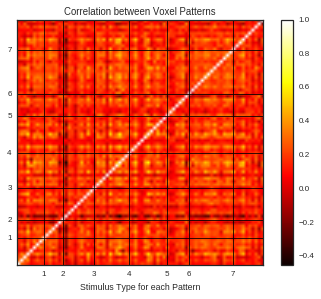

In [155]:
sub='02'
roi_number=0
(within_type_means,between_type_mean,C,C_for_plot,targets_sorted)=within_between_for_each_sub(sub,roi_number)


np.diff(targets_sorted.astype('int'))
xticks = np.where(np.diff(targets_sorted.astype('int'))==1)[0]
plt.imshow(C_for_plot,cmap="hot",origin='lower',interpolation=None)
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_yticks(xticks)
ax.set_xticklabels(np.arange(len(xticks))+1)
ax.set_yticklabels(np.arange(len(xticks))+1)
plt.colorbar()
plt.grid(b=True, which='major', color='k')
ax.set_xlabel('Stimulus Type for each Pattern')
ax.set_title('Correlation between Voxel Patterns')
plt.savefig('../../Paper_Figs/reliability_covariance_matrix.png',dpi=300)